In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LinearRegression

In [2]:
boston=datasets.load_boston() #加载load_boston()中所有数据
boston_data = pd.DataFrame(boston.data) #转换成Pandas的DataFrame数据格式
boston_data.columns= boston.feature_names #feature_names做为DataFrame的列名称
boston_data['PRICE'] = boston.target # 添加目标值to boston_data中

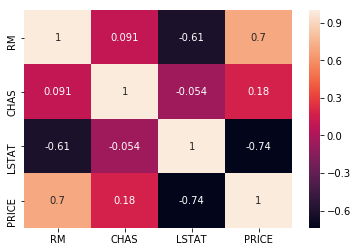

In [3]:
new_data = pd.DataFrame(boston_data, columns=["RM","CHAS","LSTAT","PRICE"])
sns.heatmap(new_data.corr(),annot=True)

In [4]:
new= pd.DataFrame(boston_data,columns=["RM","CHAS","LSTAT","PRICE"])
new.corr()

,RM,CHAS,LSTAT,PRICE
RM,1.000000,0.091251,-0.613808,0.695360
CHAS,0.091251,1.000000,-0.053929,0.175260
LSTAT,-0.613808,-0.053929,1.000000,-0.737663
PRICE,0.695360,0.175260,-0.737663,1.000000


In [5]:
new= pd.DataFrame(boston_data,columns=["RM","CHAS","LSTAT","PRICE"])
new.describe()

,RM,CHAS,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000
mean,6.284634,0.069170,12.653063,22.532806
std,0.702617,0.253994,7.141062,9.197104
min,3.561000,0.000000,1.730000,5.000000
25%,5.885500,0.000000,6.950000,17.025000
50%,6.208500,0.000000,11.360000,21.200000
75%,6.623500,0.000000,16.955000,25.000000
max,8.780000,1.000000,37.970000,50.000000


In [6]:
Select_Best = SelectKBest(f_regression, k=3)
bestFeature = Select_Best.fit_transform(boston_data, boston.target)
Select_Best.get_support()
boston_data.columns[Select_Best.get_support()]

Index(['RM', 'LSTAT', 'PRICE'], dtype='object')

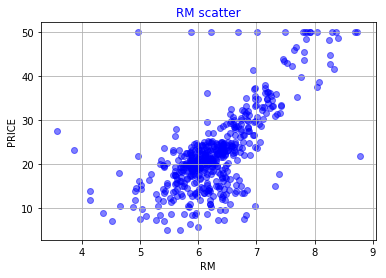

In [7]:
plt.scatter(boston_data.RM, boston_data.PRICE,alpha=0.5,facecolors='blue')
plt.title('RM scatter',color='blue')
plt.xlabel("RM")
plt.ylabel("PRICE")
plt.grid()
plt.show()

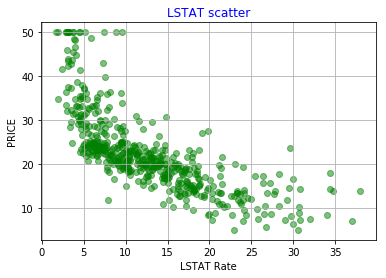

In [8]:
plt.scatter(boston_data.LSTAT, boston_data.PRICE,alpha=0.5,facecolors='green')
plt.title('LSTAT scatter',color='blue')
plt.xlabel("LSTAT Rate")
plt.ylabel("PRICE")
plt.grid()
plt.show()

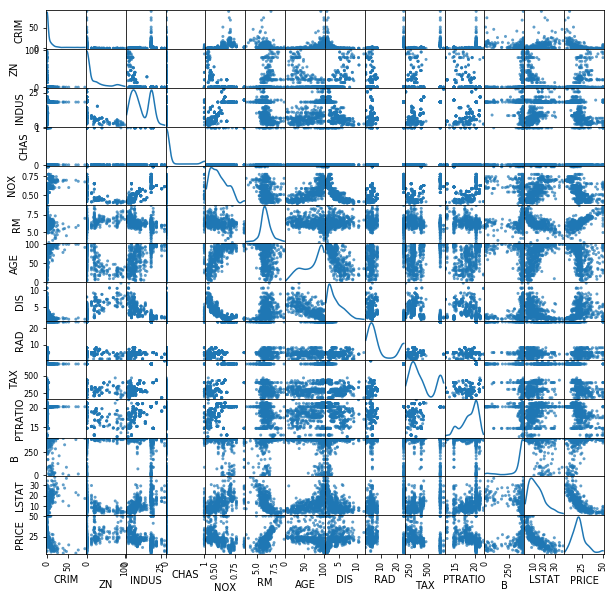

In [9]:
pd.plotting.scatter_matrix(boston_data,alpha=0.7, figsize=(10,10), diagonal='kde')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112BB630>,
      dtype=object)

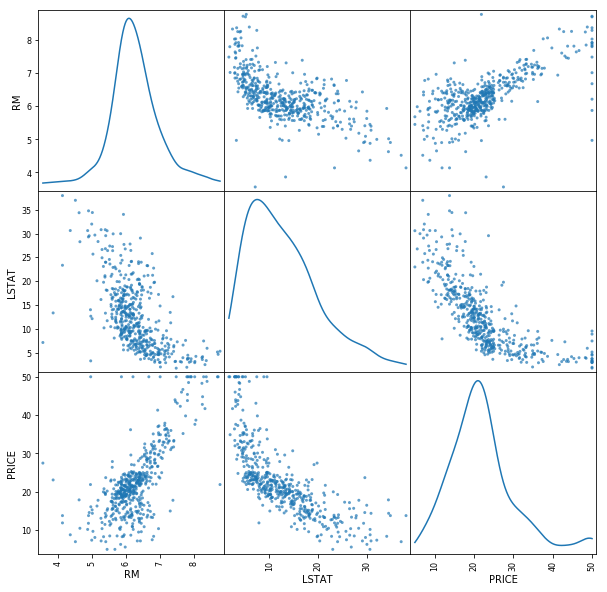

In [10]:
new = pd.DataFrame(boston_data, columns=["RM","LSTAT","PRICE"])
pd.plotting.scatter_matrix(new,alpha=0.7, figsize=(10,10), diagonal='kde')

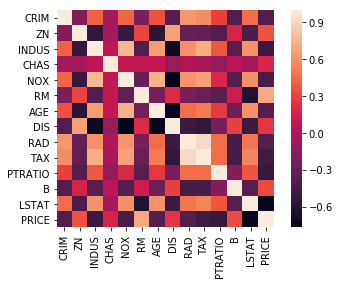

In [11]:
corrmat=boston_data.corr()
sns.heatmap(corrmat,vmax=1,square=True)

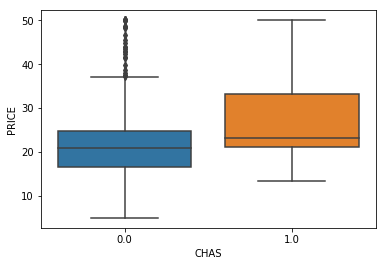

In [12]:
sns.boxplot(data=boston_data,x="CHAS",y="PRICE")
plt.show()

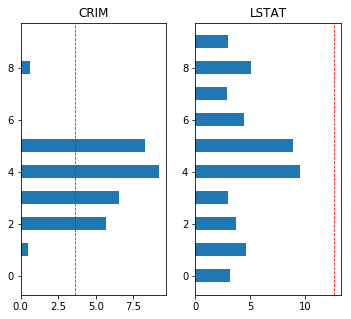

In [13]:
TOP10=boston_data.sort_values(by='PRICE',ascending=False)[:10]
fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(141)
plt.title("CRIM")
plt.barh(np.arange(10),TOP10.CRIM,height=0.5)
plt.axvline(x=boston_data.CRIM.mean(),color='r',linestyle='--',linewidth=0.8)


ax4=fig.add_subplot(142)
plt.title("LSTAT")
plt.barh(np.arange(10),TOP10.LSTAT,height=0.5)
plt.axvline(x=boston_data.LSTAT.mean(),color='r',linestyle='--',linewidth=0.8)
plt.show()


In [14]:
TOP10=boston_data.sort_values(by='PRICE',ascending=False)[:10]

In [15]:
TOP10

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
283,0.01501,90.0,1.21,1.0,0.4010,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
369,5.66998,0.0,18.10,1.0,0.6310,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1.0,0.6310,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.10,0.0,0.6310,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.10,1.0,0.6680,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0


C:\Users\David\AppData\Roaming\Python\Python36\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


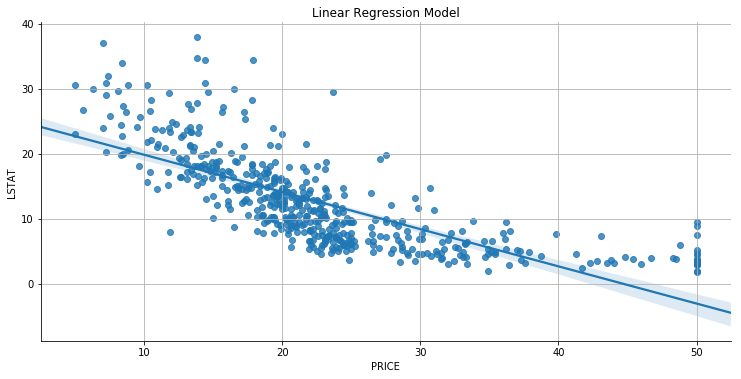

In [16]:
#一阶线性回归模型拟合
sns.lmplot("PRICE", "LSTAT", boston_data, size =5.2,aspect = 2,palette="Set1")
plt.title('Linear Regression Model')
plt.grid()
plt.show()

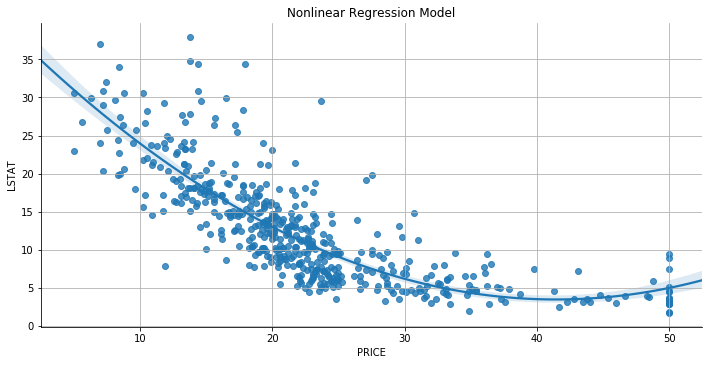

In [17]:
#二阶线性回归模型拟合
sns.lmplot("PRICE", "LSTAT", boston_data, size =5, order=2,aspect = 2,palette="Set1")
plt.title('Nonlinear Regression Model')
plt.grid()
plt.show()

In [18]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#以下用机器学习sklearn库建立预测模型

In [19]:
import sklearn 
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR                    #导入svm模型
from sklearn.ensemble import RandomForestRegressor

In [20]:
boston=datasets.load_boston() #加载load_boston()中所有数据
boston_data= boston.data
ys =boston.target 
print(ys.shape)

(506,)


In [21]:
selector = SelectKBest(f_regression, k=1)  # 选出相关性最强的SelectKBest类作为特征
selector.fit(boston_data, ys)  # 采用fit()方法进行数据拟合
xs = boston_data[:, selector.get_support()]  # 采用get_support()将数据缩减成一个向量，即数据降维
print(xs.shape)


(506, 1)


In [22]:
#模型训练

In [23]:
lrModel= LinearRegression(normalize=True)
lrModel.fit(xs ,ys)
lrModel.score(xs,ys)

0.5441462975864797

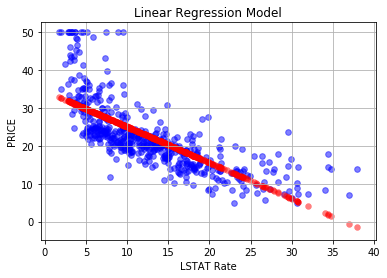

In [24]:
regressor = LinearRegression(normalize=True).fit(xs,ys)
plt.scatter(xs, ys, s=32, marker='o',alpha=0.5,facecolors='blue')
plt.scatter(xs,regressor.predict(xs),color='red', alpha=0.5,linewidth=0.3)
plt.title("Linear Regression Model")
plt.xlabel("LSTAT Rate")
plt.ylabel("PRICE")
plt.grid()
plt.show()

In [25]:
regressor = LinearRegression(normalize=True).fit(xs,ys)
alpha=regressor.intercept_  #返回一元线性方程截距
bata=np.array(regressor.coef_) #返回特征值线性系数
print('线性方程截距：',alpha )
print('线性方程系数:',bata)


线性方程截距： 34.55384087938309
线性方程系数: [-0.95004935]


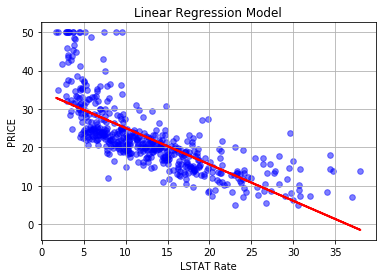

In [26]:
#绘制直线方程
regressor = LinearRegression(normalize=True).fit(xs,ys)
plt.scatter(xs, ys, s=32, marker='o', alpha=0.5,facecolors='blue')
plt.plot(xs,regressor.predict(xs),color='red', linewidth=2)
plt.title("Linear Regression Model")
plt.xlabel("LSTAT Rate")
plt.ylabel("PRICE")
plt.grid()
plt.show()

e:\python3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


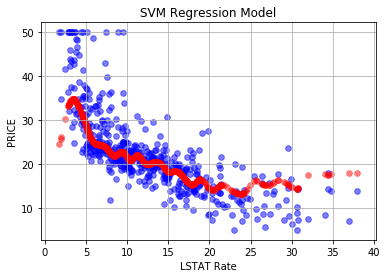

In [27]:
#SVM:support vector machine回归模型
regressor = SVR().fit(xs,ys)
plt.scatter(xs, ys, s=32, marker='o', alpha=0.5,facecolors='blue')
plt.scatter(xs,regressor.predict(xs),color='red', alpha=0.5,linewidth=0.5)
plt.title("SVM Regression Model")
plt.xlabel("LSTAT Rate")
plt.ylabel("PRICE")
plt.grid()
plt.show()

e:\python3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


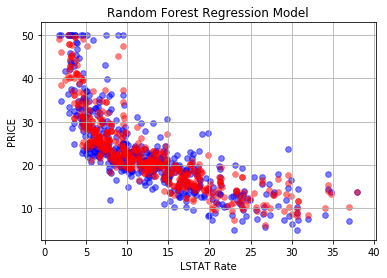

In [28]:
#随机森林( random forest)回归模型
regressor =RandomForestRegressor().fit(xs,ys)
plt.scatter(xs, ys, s=32, marker='o',alpha=0.5, facecolors='blue')
plt.scatter(xs,regressor.predict(xs),color='red', alpha=0.5,linewidth=0.5)
plt.title("Random Forest Regression Model")
plt.xlabel("LSTAT Rate")
plt.ylabel("PRICE")
plt.grid()
plt.show()